

## PARTE I



 Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

Para este ejercicio se ha desarrollado un codigo que ingresa a la carpeta de Drive y busca la carpeta para extraer la información. Posteriormente hace los calculos en base a la información seleccionada. Para ver todos los resultados favor referirse al PDF adjunto.


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, HTML
import cv2 as cv2
import os
import matplotlib.pyplot as plt

Lista de imágenes:
1. CoordCrom_1.png
2. CoordCrom_3.png
3. CoordCrom_2.png
Ingrese el número de la imagen que desea abrir: 1
Imagen Original:


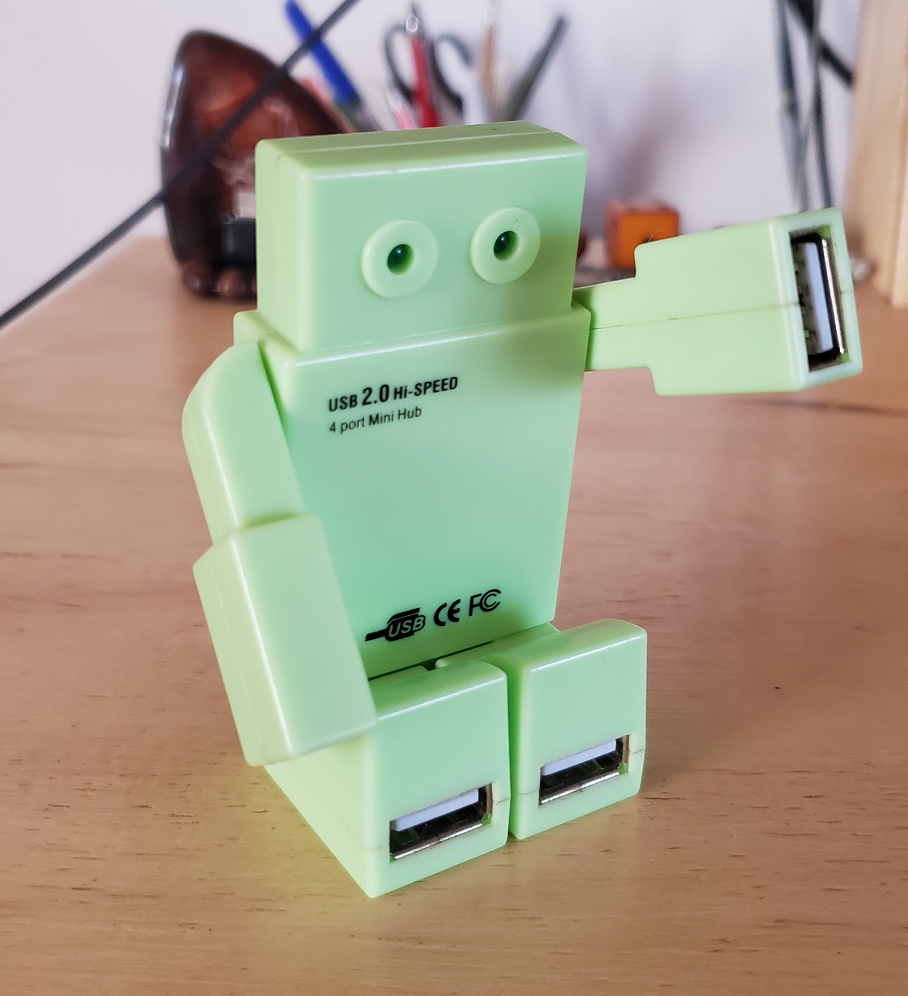


Imagen con Coordenadas Cromáticas:


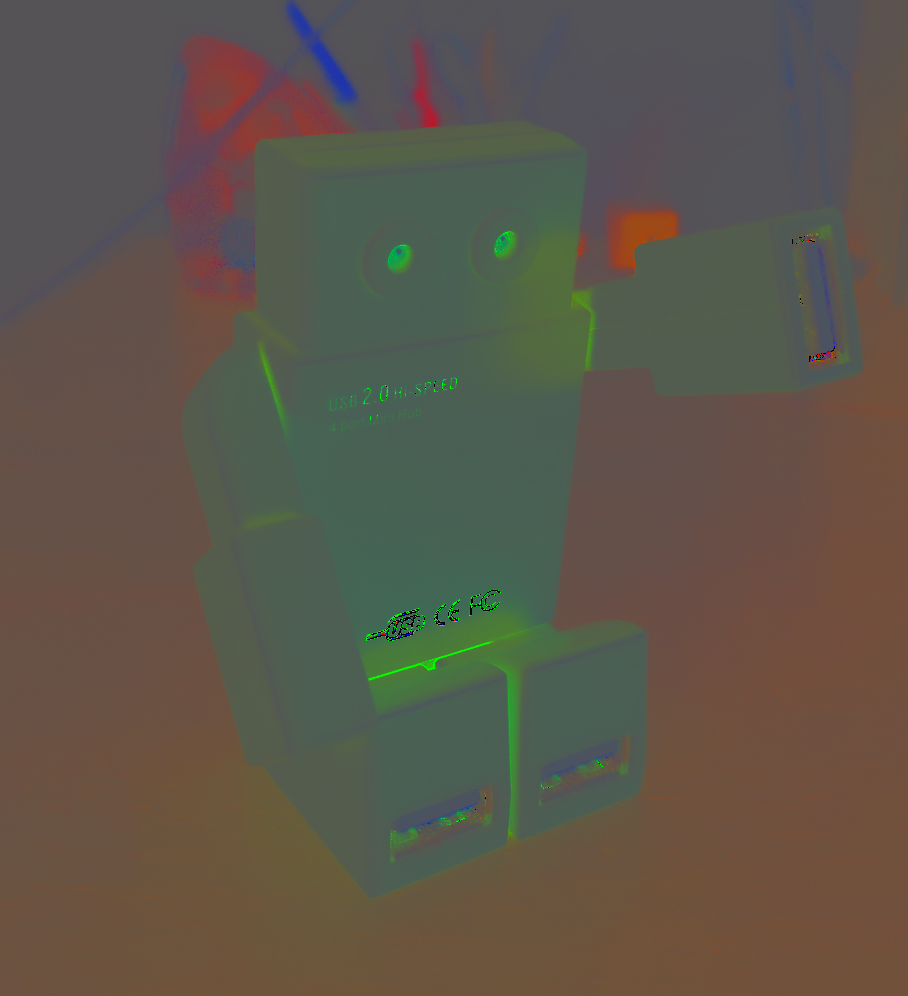

In [25]:
folder_path = '/content/drive/MyDrive/vision_computadora_I/Material_TPs/TP1/coord_cromaticas'


# Función para el pasaje a coordenadas cromáticas
def chromatic_coordinates_correction(image):
      # Convertir la imagen a tipo de dato flotante para evitar problemas de división entera
      image_float = image.astype(np.float32)

      # Calcular la suma de los canales RGB
      sum_channels = np.sum(image_float, axis=2, keepdims=True)

      # Evitar la división por cero añadiendo un valor pequeño a sum_channels
      sum_channels += 0.001

      # Normalizar los canales RGB por la intensidad total
      normalized_image = image_float / sum_channels

      # Convertir de vuelta a tipo de dato entero de 8 bits
      normalized_image = (255 * normalized_image).astype(np.uint8)

      return normalized_image


# Obtener la lista de archivos en la carpeta
file_list = os.listdir(folder_path)

# Mostrar la lista de archivos para que el usuario elija una imagen
print("Lista de imágenes:")
for i, file_name in enumerate(file_list):
    print(f"{i+1}. {file_name}")

# Solicitar al usuario que ingrese el número de la imagen que desea abrir
selected_index = int(input("Ingrese el número de la imagen que desea abrir: ")) - 1

# Comprobar si el índice seleccionado está dentro del rango de la lista de archivos
if 0 <= selected_index < len(file_list):
    # Obtener el nombre del archivo seleccionado
    selected_file = file_list[selected_index]

    # Comprobar si el archivo seleccionado es una imagen (puedes agregar más extensiones si es necesario)
    if selected_file.endswith('.jpg') or selected_file.endswith('.png'):
        # Construir la ruta completa de la imagen
        image_path = os.path.join(folder_path, selected_file)

        # Cargar la imagen utilizando OpenCV
        image = cv2.imread(image_path)
        image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Aplicar el algoritmo de pasaje a coordenadas cromáticas (retinex)
        corrected_image = chromatic_coordinates_correction(image)
        # Calcular el factor de contraste
        contrast_factor = 255.0 / np.max(corrected_image)

        # Mostrar la imagen original y la imagen procesada
        print("Imagen Original:")
        cv2_imshow(image)
        print("\nImagen con Coordenadas Cromáticas:")
        cv2_imshow(corrected_image)

else:
      print("El número de imagen seleccionado está fuera de rango.")


Lista de imágenes:
1. wp_green2.jpg
2. test_blue.png
3. wp_green.png
4. test_red.png
5. test_green.png
6. wp_red.png
7. wp_blue.jpg
8. wp_red2.jpg
Ingrese el número de la imagen que desea abrir: 5
Imagen Original:


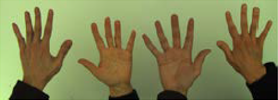


Imagen con white patch:


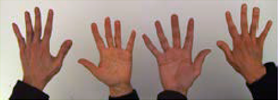

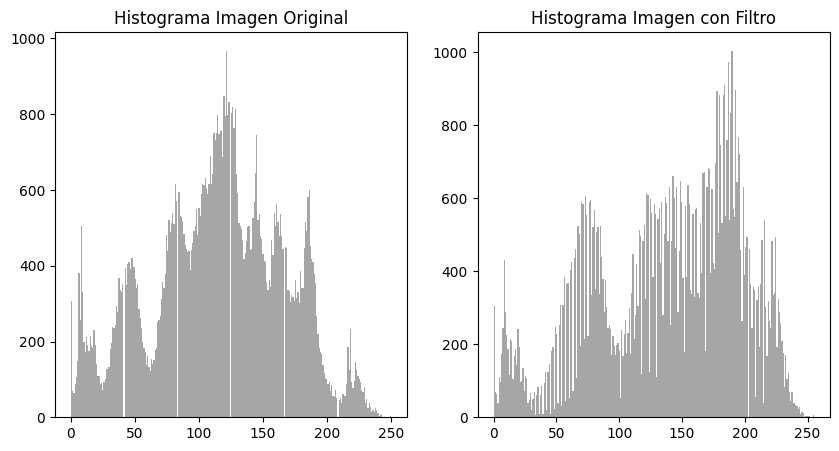

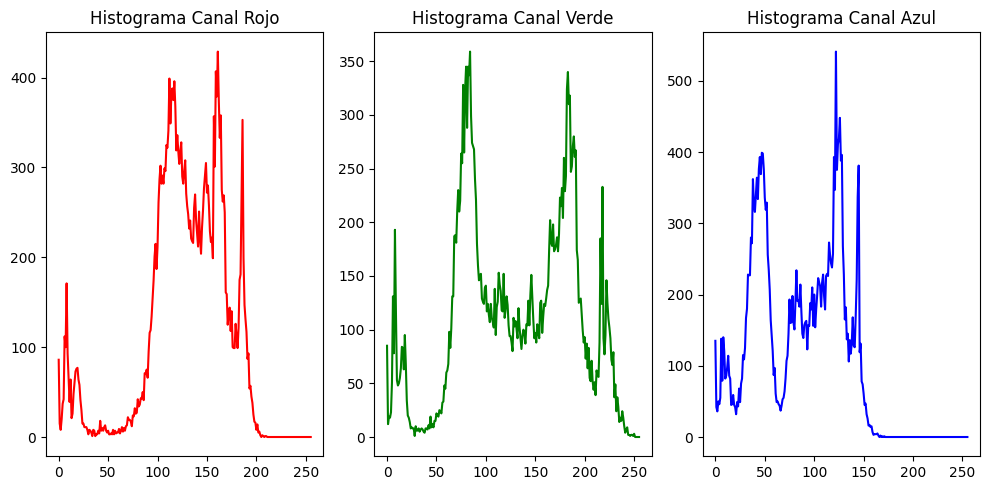

In [39]:
folder_path = '/content/drive/MyDrive/vision_computadora_I/Material_TPs/TP1/white_patch'

# Función Algoritmo Whitepatch

def white_patch(image):
    # Convertir la imagen a tipo float32
    image_float = image.astype(np.float32)

    # Calcular el máximo valor de intensidad en cada canal
    max_r = np.max(image_float[:, :, 0])
    max_g = np.max(image_float[:, :, 1])
    max_b = np.max(image_float[:, :, 2])

    # Escalar los canales de color para que los valores máximos sean 255 (blanco)
    whitebalanced_image = image_float / np.array([max_r, max_g, max_b]) * 255

    # Normalizamos los valores para que estén en el rango [0, 255]
    whitebalanced_image = np.clip(whitebalanced_image, 0, 255).astype(np.uint8)

    return whitebalanced_image

def calculate_histogram_distance(hist1, hist2):
    """
    Calcula la distancia euclidiana entre dos histogramas.
    """
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

# Obtener la lista de archivos en la carpeta
file_list = os.listdir(folder_path)

# Mostrar la lista de archivos para que el usuario elija una imagen
print("Lista de imágenes:")
for i, file_name in enumerate(file_list):
    print(f"{i+1}. {file_name}")

# Solicitar al usuario que ingrese el número de la imagen que desea abrir
selected_index = int(input("Ingrese el número de la imagen que desea abrir: ")) - 1

# Comprobar si el índice seleccionado está dentro del rango de la lista de archivos
if 0 <= selected_index < len(file_list):
    # Obtener el nombre del archivo seleccionado
    selected_file = file_list[selected_index]

    # Comprobar si el archivo seleccionado es una imagen (puedes agregar más extensiones si es necesario)
    if selected_file.endswith('.jpg') or selected_file.endswith('.png'):
        # Construir la ruta completa de la imagen
        image_path = os.path.join(folder_path, selected_file)

        # Cargar la imagen utilizando OpenCV
        image = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        # Aplicar el algoritmo de White patch
        white_patch_image = white_patch(image)

        print("Imagen Original:")
        cv2_imshow(image)
        print("\nImagen con white patch:")
        cv2_imshow(white_patch_image)

        # Calcular y graficar histogramas
        bins = 256
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.hist(image.ravel(), bins=bins, color='gray', alpha=0.7)
        plt.title('Histograma Imagen Original')

        plt.subplot(1, 2, 2)
        plt.hist(white_patch_image.ravel(), bins=bins, color='gray', alpha=0.7)
        plt.title('Histograma Imagen con Filtro')

        # Calcular los histogramas de las imágenes
        hist1, _ = np.histogram(image.ravel(), bins=bins)
        hist2, _ = np.histogram(white_patch_image.ravel(), bins=bins)

        # Normalizar los histogramas
        hist1 = hist1 / np.sum(hist1)
        hist2 = hist2 / np.sum(hist2)

        # Calcular la distancia entre los histogramas
        distance = calculate_histogram_distance(hist1, hist2)

        canales = cv2.split(image)

            # Inicializar una lista para almacenar las intensidades máximas de cada canal
        intensidades_max = []

            # Calcular la intensidad máxima para cada canal
        for canal in canales:
              intensidades_max.append(canal.max())

            # Calcular la intensidad máxima global
        intensidad_max_global = max(intensidades_max)

        # Datos a imprimir
        datos = {"Imagen": file_list[selected_index],"Intensidad máxima global (Original)": intensidad_max_global, "Distancia entre los histogramas": distance}

        # Convertir los datos a HTML
        html = "<div style='border: 1px solid black; padding: 10px;'>"
        for key, value in datos.items():
            html += f"<p><b>{key}:</b> {value}</p>"
        html += "</div>"

        # Mostrar los datos en un cuadro
        display(HTML(html))

        # Separar los canales RGB
        r_channel = img_rgb[:,:,0]
        g_channel = img_rgb[:,:,1]
        b_channel = img_rgb[:,:,2]

        # Calcular los histogramas de cada canal RGB
        hist_r = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
        hist_b = cv2.calcHist([b_channel], [0], None, [256], [0, 256])

        # Mostrar los histogramas
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.plot(hist_r, color='red')
        plt.title('Histograma Canal Rojo')

        plt.subplot(1, 3, 2)
        plt.plot(hist_g, color='green')
        plt.title('Histograma Canal Verde')

        plt.subplot(1, 3, 3)
        plt.plot(hist_b, color='blue')
        plt.title('Histograma Canal Azul')

        plt.tight_layout()
        plt.show()

    else:
        print("El número de imagen seleccionado está fuera de rango.")



# PARTE II

Lista de imágenes:
1. segmentacion.png
2. img1_tp.png
3. img2_tp.png
4. coord_cromaticas
5. white_patch
Ingrese el número de la imagen que desea abrir: 2


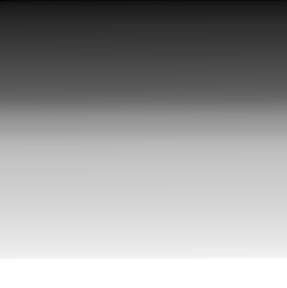

In [ ]:
coord_cromaticas = '/content/drive/MyDrive/vision_computadora_I/Material_TPs/TP1'

file_list = os.listdir(coord_cromaticas)

print("Lista de imágenes:")
for i, file_name in enumerate(file_list):
    print(f"{i+1}. {file_name}")

selected_index = int(input("Ingrese el número de la imagen que desea abrir: ")) - 1

if 0 <= selected_index < len(file_list):
    selected_file = file_list[selected_index]

    if selected_file.endswith('.jpg') or selected_file.endswith('.png'):
        image_path = os.path.join(coord_cromaticas, selected_file)

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE )
        cv2_imshow(image)

else:
    print("El número de imagen seleccionado está fuera de rango.")

In [ ]:
#Binarizacion por umbral fijo

# Funcion de binarización (a mano)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

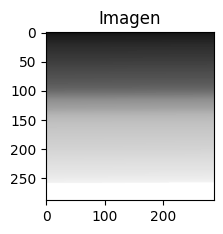

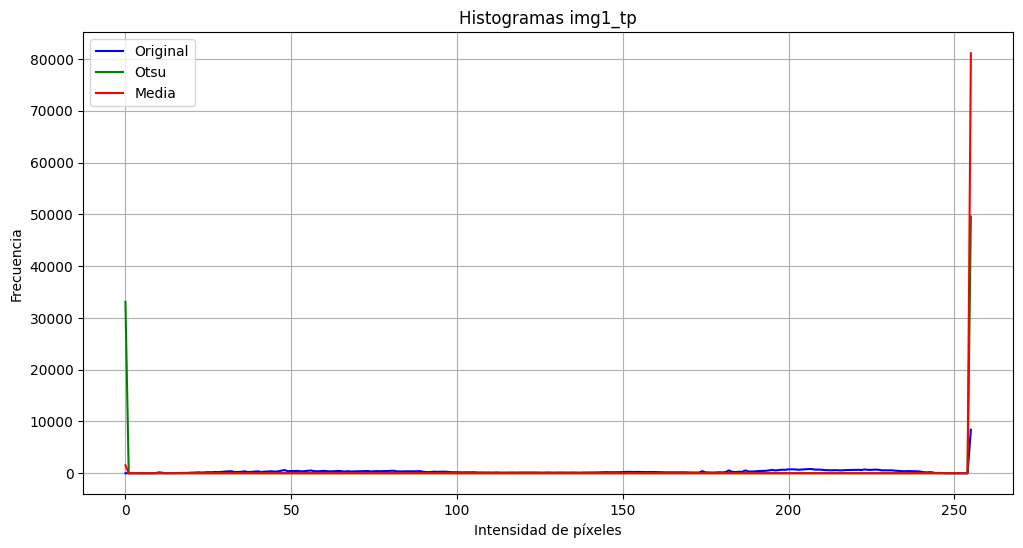

In [ ]:
# Número de bins para el histograma
num_bins = 256
img = image.copy()

hist_original, _ = np.histogram(img.ravel(), bins=num_bins, range=[0, 256])

_, img_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

hist_otsu, _ = np.histogram(img_otsu.ravel(), bins=num_bins, range=[0, 256])

img_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

hist_mean, _ = np.histogram(img_mean.ravel(), bins=num_bins, range=[0, 256])
ax1=plt.subplot(221)
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen')

# Graficar los histogramas
plt.figure(figsize=(12, 6))
plt.plot(hist_original, color='blue', label='Original')
plt.plot(hist_otsu, color='green', label='Otsu')
plt.plot(hist_mean, color='red', label='Media')
plt.title('Histogramas img1_tp')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

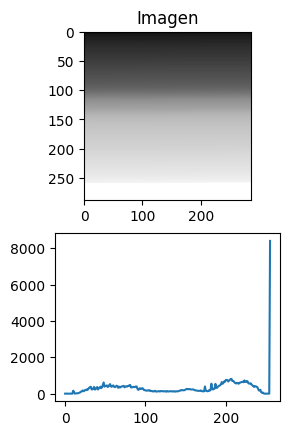

In [ ]:
# Nueva figura
fig = plt.figure()
img = image.copy()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen')

hist1,bins1 = np.histogram(img.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

plt.show()

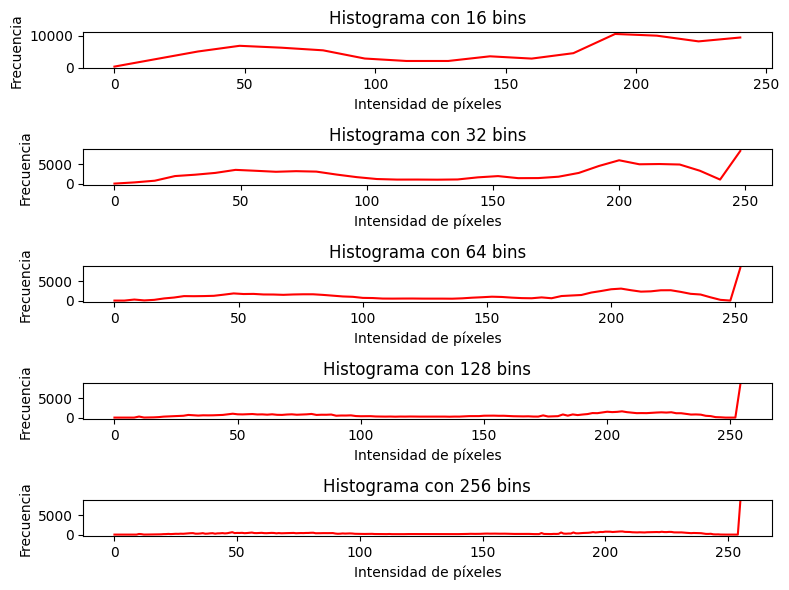

In [ ]:
# Definir los valores de bins que queremos probar
img = image.copy()
num_bins_values = [16, 32, 64, 128, 256]

fig, axes = plt.subplots(nrows=len(num_bins_values), ncols=1, figsize=(8, 6))

for i, num_bins in enumerate(num_bins_values):
    ax = axes[i]
    hist, bins = np.histogram(img.flatten(), bins=num_bins, range=[0,256])
    ax.plot(bins[:-1], hist, color='red')
    ax.set_title(f'Histograma con {num_bins} bins')
    ax.set_xlabel('Intensidad de píxeles')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

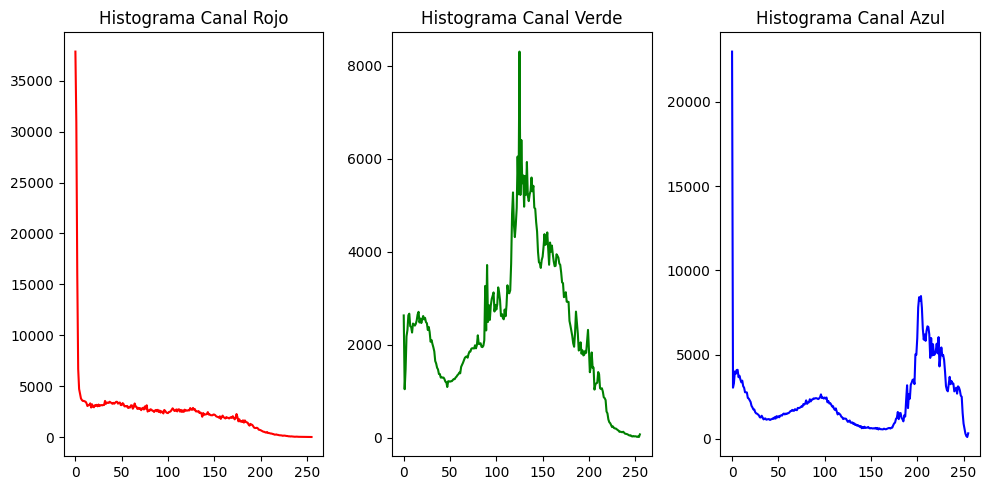

In [ ]:
img = cv2.imread('/content/drive/MyDrive/vision_computadora_I/Material_TPs/TP1/segmentacion.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales RGB
r_channel = img_rgb[:,:,0]
g_channel = img_rgb[:,:,1]
b_channel = img_rgb[:,:,2]

# Calcular los histogramas de cada canal RGB
hist_r = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b_channel], [0], None, [256], [0, 256])

# Mostrar los histogramas
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(hist_r, color='red')
plt.title('Histograma Canal Rojo')

plt.subplot(1, 3, 2)
plt.plot(hist_g, color='green')
plt.title('Histograma Canal Verde')

plt.subplot(1, 3, 3)
plt.plot(hist_b, color='blue')
plt.title('Histograma Canal Azul')

plt.tight_layout()
plt.show()

Valor mínimo de píxeles: 0
Valor máximo de píxeles: 255


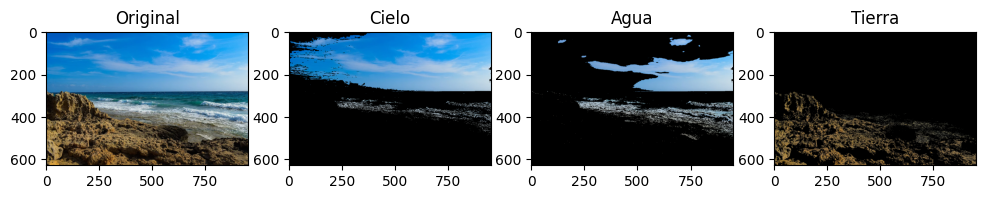

In [ ]:
# Cargar la imagen
img = cv2.imread('/content/drive/MyDrive/vision_computadora_I/Material_TPs/TP1/segmentacion.png')

# Convertir de BGR a RGB por compatibilidad
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
min_pixel = img.min()
max_pixel = img.max()

print("Valor mínimo de píxeles:", min_pixel)
print("Valor máximo de píxeles:", max_pixel)

##-- Se definen rangos manuales -- ##

# Rango de azules (agua)
lower_blue = np.array([100, 150, 150])  # Ajuste para tonos claros de azul
upper_blue = np.array([200, 250, 255])  # Blanco para capturar espuma de mar

# Rango de verdes (cielo)
lower_green = np.array([0, 50, 200])
upper_green = np.array([200, 250, 255])

# Rango de marrones (tierra)
lower_brown = np.array([100, 80, 0])     # Ajuste para arena
upper_brown = np.array([200, 180, 100])  # Ajuste para tonos más oscuros de marrón

##-- Mascaras usando los rangos -- ##


# Aplicar mascaras para segmentar los elementos
mask_blue = cv2.inRange(img_rgb, lower_blue, upper_blue)
mask_green = cv2.inRange(img_rgb, lower_green, upper_green)
mask_brown = cv2.inRange(img_rgb, lower_brown, upper_brown)

# Aplicar las mascaras a la imagen original
segmented_blue = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_blue)
segmented_green = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_green)
segmented_brown = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_brown)

# Mostrar las imágenes segmentadas
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 3)
plt.imshow(segmented_blue)
plt.title('Agua')

plt.subplot(1, 4, 2)
plt.imshow(segmented_green)
plt.title('Cielo')

plt.subplot(1, 4, 4)
plt.imshow(segmented_brown)
plt.title('Tierra')

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Original')

plt.show()
